<a href="https://colab.research.google.com/github/phillevn/Rotation-and-CNN-for-MNIST-learning/blob/master/Rotation_CNN_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Convolution Neuron Network

In this post we will discuss some advantages of image rotation learning for MNIST set. As we know that, Convolution Neuron Network show that it is very efficient to classify the handwriting numbers in MNIST set. With the epoch = 10, we have the accuracy upto 98% when we evaluate the x_test, y_test set. 

### An issue with the original dataset

When we train the machine with the original dataset, it works beautifully. However, there is an issue with it. If we look closer to the dataset. The data set was almost processed to oriented in vertical way. 







In [0]:
import tensorflow as tf
from tensorflow import keras
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


import matplotlib.pyplot as plt


In [2]:
mnist = keras.datasets.mnist
(X1_train_full, y1_train_full), (X1_test, y1_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Here is an issue I want to discuss. The following is the number 9 from the dataset

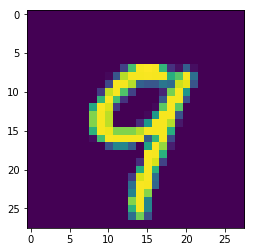

In [3]:
number = X1_test[12:13]
number = number.reshape([28,28])
plt.imshow(number)

The above picture shows us that the number 9 was already rotated such that it is in some of the most natural way. It lacks the variaties of the way to write the numbers also in normal writing and in some extreme cases. As you will see below, this is other way to write number 9 that we may see often in hand writing notes. The number as rotated 60 degree counter clockwise.

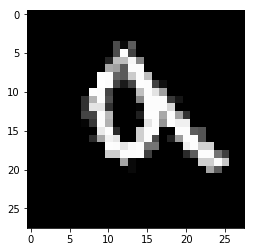

In [4]:

import skimage
import PIL
g = X1_test[12:13]
g = np.array(g, dtype='uint8')
g=g.reshape([28,28])
g = skimage.color.gray2rgb(g)
g=PIL.Image.fromarray(g)
g = g.rotate(60)
g = np.array(g, dtype='uint8')
plt.imshow(g)

## Is it a big deal?

The answer is yes. Below, I will show you what it is. First, I will train the machine with the original dataset but then I will evaluate the model with the new random rotated dateset. Here is the code

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0712 17:43:54.799475 140296605013888 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model.fit(x_train, y_train, epochs=10)



Epoch 1/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2174 - acc: 0.9355
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0981 - acc: 0.9700
Epoch 3/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0699 - acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0521 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0423 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0361 - acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0320 - acc: 0.9897
Epoch 8/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0266 - acc: 0.9911
Epoch 9/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0230 - acc: 0.9924
Epoch 10/10
60000/60000 [==============================] - 10s 1

And we evaluate the model with the x_test

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0818 - acc: 0.9807


[0.0817630238593647, 0.9807]

The result is very good, we attain the accuracy upto 98%

Next, we create a new test set where the set was rotated by random angle from -60 to 60 degree

In [0]:
import random
import skimage
import PIL
random.seed(100)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_gen_test = np.ndarray(shape = (len(x_test),28,28))
x_gen_test_angle = np.ndarray(shape = (len(x_test)), dtype = 'int8')
for index in range(len(x_test)):
  ran_num = random.randint(-60,60)
  g = x_test[index]
  g = np.array(g, dtype='uint8')
  g=g.reshape([28,28])
  g = skimage.color.gray2rgb(g)
  g=PIL.Image.fromarray(g)
  g = g.rotate(ran_num)
  g = np.array(g, dtype='uint8')
  x_gen_test[index] = g[:,:,0]
  x_gen_test_angle[index] = ran_num
  
x_gen = x_gen_test/255

Let us evaluate the model with our rotated test set

In [9]:

model.evaluate(x_gen, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 3.0033 - acc: 0.6811


[3.0033267280578615, 0.6811]

# We see that, the accuracy drops to 69%. That is not good at all. So, what happens here. We will discuss more below.

## Let us train the model with randomly rotated dataset

We keep the same model as before, let us call it new_model

In [0]:
new_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We also create new training data set with random angle between -60 and 60

In [0]:
import random
import skimage
import PIL
random.seed(100)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_gen_train = np.ndarray(shape = (len(x_train),28,28))
x_gen_train_angle = np.ndarray(shape = (len(x_train)), dtype = 'int8')
for index in range(len(x_train)):
  ran_num = random.randint(-60,60)
  g = x_train[index]
  g = np.array(g, dtype='uint8')
  g=g.reshape([28,28])
  g = skimage.color.gray2rgb(g)
  g=PIL.Image.fromarray(g)
  g = g.rotate(ran_num)
  g = np.array(g, dtype='uint8')
  x_gen_train[index] = g[:,:,0]
  x_gen_train_angle[index] = ran_num
  
x_train_new= x_gen_train / 255.0
y_train_new = y_train
#x_train_new[30000:] = x_train[:30000]
#y_train_new[30000:] = y_train[:30000]

In [12]:

new_model.fit(x_train_new, y_train_new, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4364 - acc: 0.8660
Epoch 2/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2132 - acc: 0.9332
Epoch 3/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1551 - acc: 0.9520
Epoch 4/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1223 - acc: 0.9609
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0976 - acc: 0.9690
Epoch 6/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0793 - acc: 0.9742
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0678 - acc: 0.9776
Epoch 8/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0582 - acc: 0.9799
Epoch 9/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0515 - acc: 0.9826
Epoch 10/10
60000/60000 [==============================] - 9s 157us/samp

In [13]:
x_gen = x_gen_test/255
new_model.evaluate(x_gen, y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.1712 - acc: 0.9551


[0.1712171384229092, 0.9551]

In [14]:
x_gen = x_gen_test/255
model.evaluate(x_gen, y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 3.0033 - acc: 0.6811


[3.0033267280578615, 0.6811]

The new_model gives us the accurary for the rotated test set upto 95%.  And the old model has accuracy about 69%  with the same rotated test set which is much lower than the new_model.

Then you may ask, what if we test on the original test set. Which model is better in this case. As you see below, we get 96% accuracy for the new_model but we got 98% accuracy for the old model with original training set. However, the difference is not much and it may be the cause of overfitting for the original dataset.

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
new_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 31.8734 - acc: 0.9620


[31.873412122806908, 0.962]

## Conclusion

With the original dataset, we may overfit the training since some of the number was allign in the most "vertical" way. It lack the varieties to train the model to learn different situations which actually occurs in real life. By rotating the images, we train the model to understand different situations for the same things, and therefore, the model learn better and be able to classifies more accurate than the classical way.

# Appendix about the code in Google Colab


### Issue 1: 

I had a problem when I tried to show an image in Google Colab. After searching over internet (I forgot the sources), I made it works by including the following codes


import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

### Issue 2: 

In the note, I said that we rotate the image. That means you must do it from the image, not from the np.array. If you rotate the np.mdarray, you may not have the same pictures since some part of the pictures can be transformed to different color. That means we may have some bizarre image. 

So, since the mist set from kerass was saved in np.mdarray, I must convert to the image by using 

PIL.Image.fromarray()

which is from PIL library. Then we use rotate to rotate the image and then we transform back to np.mdarray and reshape the array to [28,28] dimension.

Probably, there is other easy way to do all but I am lazy to find one.

## More discussion

In this part, we want to discuss about using less sample size to train our model by using just a half of observations from MNIST dataset, i.e., we only need 30,000 out of 60,000 observations. We believe that, we still have the same or at least very close accuracy compairing to using the full original dataset training model. Okay, let us start with the code.

We still keep the same rotated train set we did before, but we only use the first 30,000 observations to train our model. Since we use less data, it is better to increase the epoch from 10 to 30 to get better training.

In [0]:
halfsize_new_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

halfsize_new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
x_train_new= x_gen_train / 255.0
y_train_new = y_train
x_train_new[30000:] = x_train[:30000]
y_train_new[30000:] = y_train[:30000]
halfsize_new_model.fit(x_train_new, y_train_new, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 9s 156us/sample - loss: 3.2810 - acc: 0.7344
Epoch 2/50
60000/60000 [==============================] - 9s 155us/sample - loss: 1.1753 - acc: 0.7949
Epoch 3/50
60000/60000 [==============================] - 9s 154us/sample - loss: 1.0460 - acc: 0.8231
Epoch 4/50
60000/60000 [==============================] - 9s 154us/sample - loss: 0.8726 - acc: 0.8435
Epoch 5/50
60000/60000 [==============================] - 9s 153us/sample - loss: 0.8308 - acc: 0.8538
Epoch 6/50
60000/60000 [==============================] - 9s 157us/sample - loss: 0.8292 - acc: 0.8645
Epoch 7/50
60000/60000 [==============================] - 9s 155us/sample - loss: 0.7829 - acc: 0.8745
Epoch 8/50
60000/60000 [==============================] - 9s 151us/sample - loss: 0.7598 - acc: 0.8843
Epoch 9/50
60000/60000 [==============================] - 9s 153us/sample - loss: 0.7367 - acc: 0.8945
Epoch 10/50
60000/60000 [==============================] - 13s 210us/samp

Next, we test on two cases. First case is for the original x_test and y_test and the other is the x_gen_test and y_test to see how good the training is.

The following is for the original x_test, y_test evaluation of our model training

In [20]:
halfsize_new_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 5.2752 - acc: 0.9484


[5.275166777122513, 0.9484]

So, we see that we only get 6 points for error compairing to 4 points for error in the full dataset training which is still good enough

And for the x_gen_new, y_gen_new

In [21]:
halfsize_new_model.evaluate(x_gen, y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.3667 - acc: 0.9320


[0.36667180723417553, 0.932]

It is not well as the model with rotation with the full data by 3 points but it is still good. If we increasing the epoch number to a larger one we may have better accuracy on the x_gen, y_test but it may be overfitting and it could reduce the ability of the model to recognize new factor.